In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
%matplotlib inline

In [2]:
X = np.loadtxt('Datasets\\circle.csv', delimiter=',')

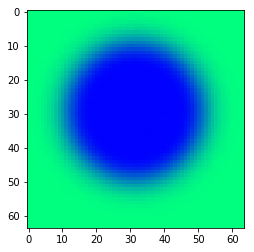

In [3]:
plt.imshow(X, cmap="winter")

In [4]:
width = len(X)
X = X.flatten()
num_observations = len(X)

In [5]:
def regularizer(parameter, n):
    # parameter has the shape n square
    summation = 0.0
    for i in range(n * n):
        if i % n != 0:
            summation = summation + cvxpy.abs(parameter[i] - parameter[i - 1])
        if i >= n:
            summation = summation + cvxpy.abs(parameter[i] - parameter[i - n])
    return summation

In [6]:
weight = cvxpy.Variable(num_observations, 1)
objective = cvxpy.Minimize(0.5 * cvxpy.sum_squares(X - weight) + regularizer(weight, width))
constraints = []
problem = cvxpy.Problem(objective, constraints)
result = problem.solve() 

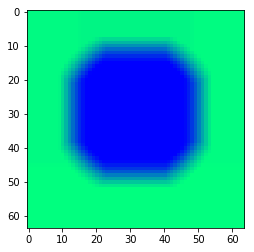

In [7]:
plt.imshow(weight.value.reshape(width,width), cmap = 'winter')

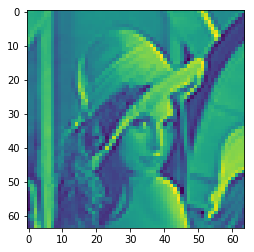

In [8]:
Y = np.loadtxt('Datasets\\lenna_64.csv', delimiter=',')
plt.imshow(Y)

In [9]:
width = len(Y)
Y = Y.flatten()
num_observations = len(Y)

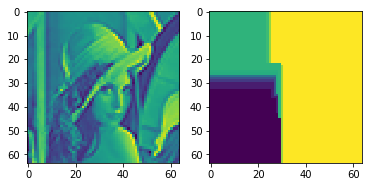

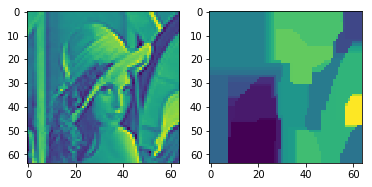

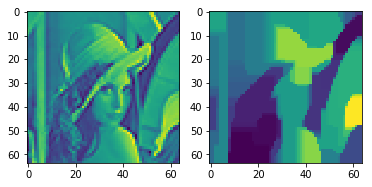

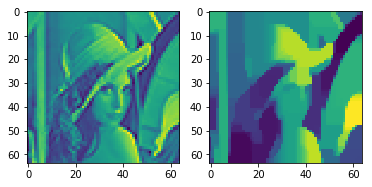

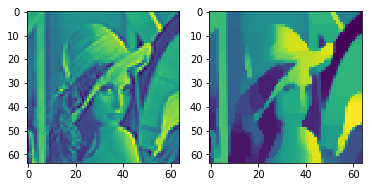

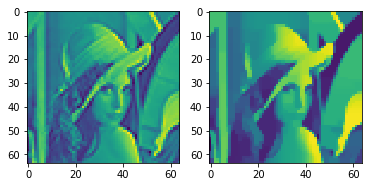

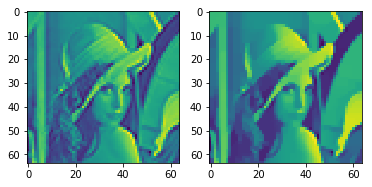

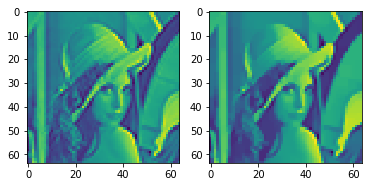

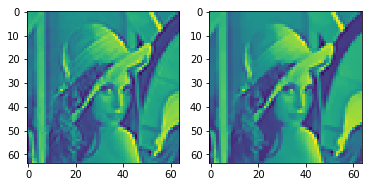

In [10]:
N = 9
for hyperparameter in range(N):
    weight = cvxpy.Variable(num_observations, 1)
    objective = cvxpy.Minimize(0.5 * cvxpy.sum_squares(Y - weight) + 10 ** (-hyperparameter / 4.0) * regularizer(weight, width))
    constraints = []
    problem = cvxpy.Problem(objective, constraints)
    result = problem.solve()
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.imshow(Y.reshape(width,width))
    ax2.imshow(weight.value.reshape(width,width))